In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import requests

url = "https://api.massive.com/v2/aggs/ticker/AAPL/range/1/day/2025-11-16/2026-02-15?adjusted=true&sort=asc&limit=120&apiKey=MQaU6QNy707P2KniWLX3DFvPlmQyegbE"    # Daha önce bulduğunuz URL ile değiştirin
response = requests.get(url)
api_data = response.json()

In [5]:
print(type(api_data))


<class 'dict'>


In [6]:
api_data.keys()


dict_keys(['ticker', 'queryCount', 'resultsCount', 'adjusted', 'results', 'status', 'request_id', 'count'])

In [7]:
type(api_data["results"])


list

In [11]:
apple_df = pd.DataFrame(api_data["results"])
apple_df.head()

,v,vw,o,c,h,l,t,n
0,45018260.0,267.9841,268.815,267.46,270.49,265.73,1763355600000,705791
1,45677278.0,267.7250,269.990,267.44,270.71,265.32,1763442000000,706583
2,40424492.0,269.3251,265.525,268.56,272.21,265.50,1763528400000,626377
3,45823568.0,269.4695,270.830,266.25,275.43,265.92,1763614800000,756494
4,59030832.0,270.5152,265.950,271.49,273.33,265.67,1763701200000,794102


In [13]:
apple_df["t"] = pd.to_datetime(apple_df["t"], unit="ms")
apple_df.head()

,v,vw,o,c,h,l,t,n
0,45018260.0,267.9841,268.815,267.46,270.49,265.73,2025-11-17 05:00:00,705791
1,45677278.0,267.7250,269.990,267.44,270.71,265.32,2025-11-18 05:00:00,706583
2,40424492.0,269.3251,265.525,268.56,272.21,265.50,2025-11-19 05:00:00,626377
3,45823568.0,269.4695,270.830,266.25,275.43,265.92,2025-11-20 05:00:00,756494
4,59030832.0,270.5152,265.950,271.49,273.33,265.67,2025-11-21 05:00:00,794102


In [19]:
apple_df.head()

,v,vw,o,c,h,l,n
t,,,,,,,
2025-11-17 05:00:00,45018260.0,267.9841,268.815,267.46,270.49,265.73,705791
2025-11-18 05:00:00,45677278.0,267.7250,269.990,267.44,270.71,265.32,706583
2025-11-19 05:00:00,40424492.0,269.3251,265.525,268.56,272.21,265.50,626377
2025-11-20 05:00:00,45823568.0,269.4695,270.830,266.25,275.43,265.92,756494
2025-11-21 05:00:00,59030832.0,270.5152,265.950,271.49,273.33,265.67,794102


In [24]:
apple_df = apple_df.rename(columns={
    "v": "volume",
    "vw": "avg_price",
    "n":"number",
    "o": "open",
    "c": "close",
    "h": "high",
    "l": "low"
})


In [25]:
apple_df.columns


Index(['volume', 'avg_price', 'open', 'close', 'high', 'low', 'number'], dtype='str')

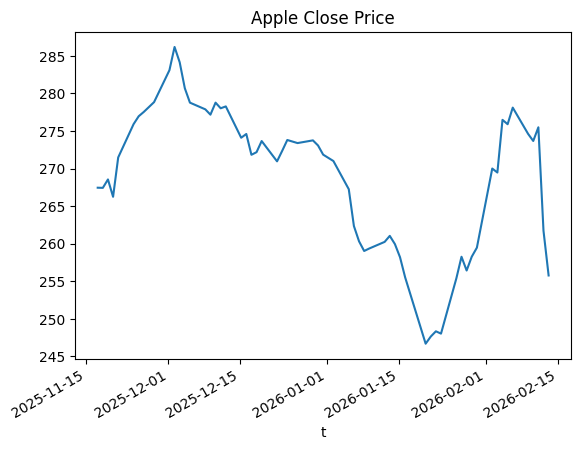

In [26]:
apple_df["close"].plot()
plt.title("Apple Close Price")
plt.show()


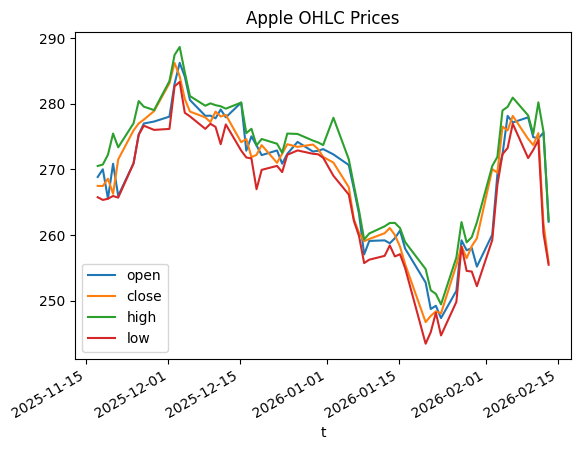

In [27]:
apple_df[["open", "close", "high", "low"]].plot()
plt.title("Apple OHLC Prices")
plt.show()


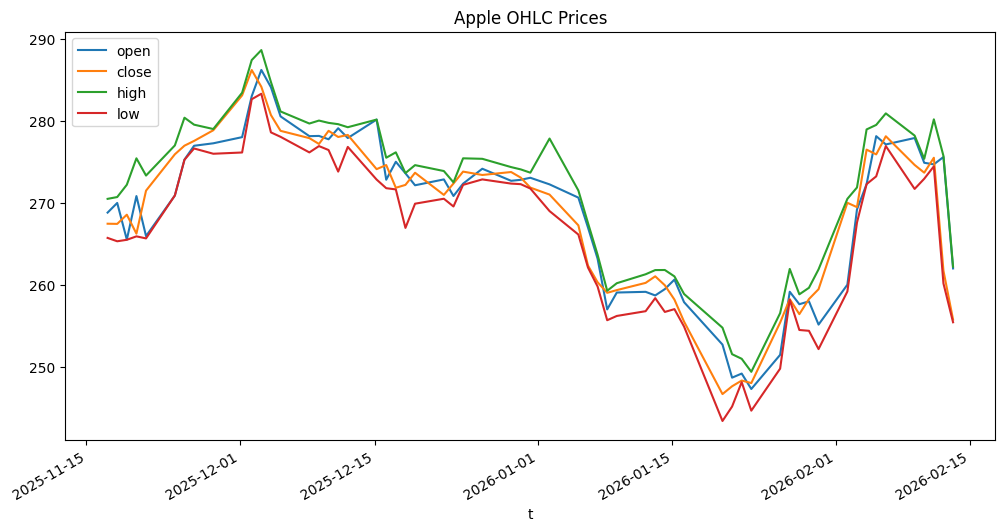

In [28]:
apple_df[["open", "close", "high", "low"]].plot(figsize=(12,6))
plt.title("Apple OHLC Prices")
plt.show()


In [30]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())



============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-9.0.2, pluggy-1.6.0 -- /home/demet/.pyenv/versions/3.12.9/bin/python3.12
cachedir: .pytest_cache
rootdir: /home/demet/data-stock-market/tests
plugins: anyio-4.12.1
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp FAILED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date FAILED        [100%]

=================================== FAILURES ===================================
__________________ TestApple.test_apple_df_index_is_timestamp __________________

self = <tests.test_apple.TestApple testMethod=test_apple_df_index_is_timestamp>

    def test_apple_df_index_is_timestamp(self):
>       self.assertEqual(self.result.index_type, '<M8[ns]', "Check you converted the 'date' colummn into a `datetime`.")
E       AssertionError: dt